# Machine Learning IDATT2502 - Artificial Neural Network

These exercises constructs the foundation for artificial neural network through implementing boolean logic (`NOT, NAND, XOR`) with predictor models.

Ultimately, these predictor models will be used in order to classify different hand-written numbers. The loss function for classification problems is usually not based on Mean Square Error (MSE) but rather on Cross Entropy:

$$\text{loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y^{(i)} \log(f(x^{(i)})) + (1 - y^{(i)}) \log(1 - f(x^{(i)})) \right]$$


Specifically in this notebook, I will be using PyTorch's torch.nn.functional.cross_entropy since this loss function focuses on <b>mutually exclusive</b> classification. Additionally, for numerical stability, the loss function will take in <b>logits</b> instead of the previously used `f(x)`. A simplified explanation of logits is that it is the unnormalized output from the model.

## General Sigmoid Predictor Model

In [1]:
class SigmoidModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
        
    def logits(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        return x @ self.W + self.b
    
    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))
    
    # Cross Entropy loss
    def loss(self, x, y):
        y = torch.tensor(y, dtype=torch.float32)
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

## NOT-Operator

In [2]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d

matplotlib.rcParams.update({'font.size': 11})
    
NOT_model = SigmoidModel()

NOT_model.W = torch.tensor([[0.0]], requires_grad=True)
 
x_train = np.array([[0], [1]])
y_train = np.array([[1], [0]])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([NOT_model.W, NOT_model.b], 0.001)

# Run 10000 optimization iterations.
for epoch in range(100000):
    NOT_model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (NOT_model.W, NOT_model.b, NOT_model.loss(x_train, y_train)))

W = tensor([[-5.8303]], requires_grad=True), b = tensor([[2.6990]], requires_grad=True), loss = tensor(0.0539, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


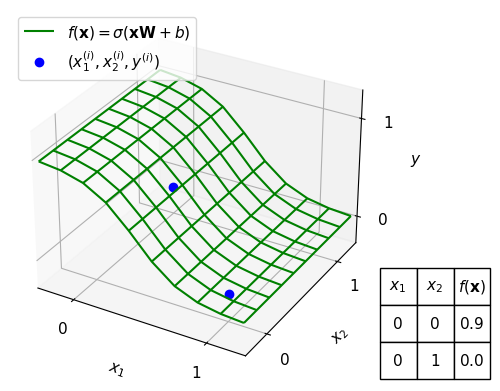

In [4]:
fig = plt.figure("Logistic regression: the logical NOT operator")

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color="green", label="$f(\\mathbf{x})=\\sigma(\\mathbf{xW}+b)$")

plot1.plot(x_train[:, 0].squeeze(), y_train[:, 0].squeeze(), 'o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$", color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 0], [0, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  bbox=[1.0, 0.0, 0.3, 0.3])


def update_figure(event=None):
    if (event is not None):
        if event.key == "W":
            NOT_model.W[0, 0] += 0.2
        elif event.key == "w":
            NOT_model.W[0, 0] -= 0.2
        elif event.key == "E":
            NOT_model.W[1, 0] += 0.2
        elif event.key == "e":
            NOT_model.W[1, 0] -= 0.2

        elif event.key == "B":
            NOT_model.b[0, 0] += 0.2
        elif event.key == "b":
            NOT_model.b[0, 0] -= 0.2

        elif event.key == "c":
            NOT_model.W = W_init.copy()
            NOT_model.b = b_init.copy()

    global plot1_f
    plot1_f.remove()
    x1_grid, x2_grid = np.meshgrid(np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
    y_grid = np.empty([10, 10])
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            y_grid[i, j] = NOT_model.f([[x1_grid[i, j]]])
    plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

    table._cells[(1, 2)]._text.set_text("${%.1f}$" % NOT_model.f([[0]]))
    table._cells[(2, 2)]._text.set_text("${%.1f}$" % NOT_model.f([[1]]))

    plt.pause(0.01)
    fig.canvas.draw()


update_figure()
fig.canvas.mpl_connect('key_press_event', update_figure)

plt.show()

## NAND-Operator

In [5]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d

matplotlib.rcParams.update({'font.size': 11})
    
NAND_model = SigmoidModel()


x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[1], [1], [1], [0]])

In [6]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([NAND_model.W, NAND_model.b], 0.001)

# Run 10000 optimization iterations.
for epoch in range(100000):
    NAND_model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (NAND_model.W, NAND_model.b, NAND_model.loss(x_train, y_train)))

W = tensor([[-3.0362],
        [-3.0362]], requires_grad=True), b = tensor([[4.7716]], requires_grad=True), loss = tensor(0.1435, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


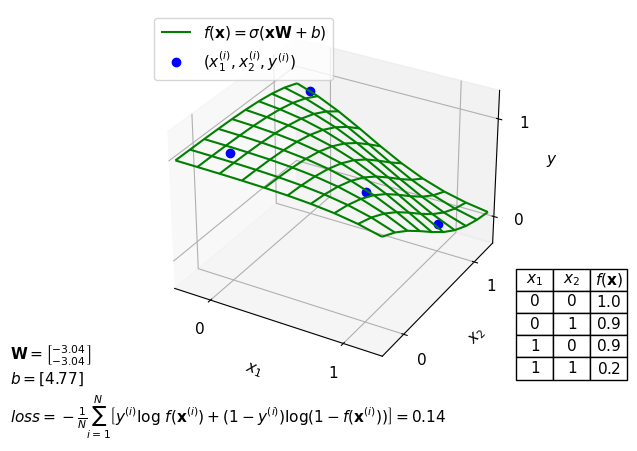

In [7]:
fig = plt.figure("Logistic regression: the logical NAND operator")

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color="green", label="$f(\\mathbf{x})=\\sigma(\\mathbf{xW}+b)$")

plot1.plot(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), 'o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$", color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  bbox=[1.0, 0.0, 0.3, 0.3])


def update_figure(event=None):
    if (event is not None):
        if event.key == "W":
            NAND_model.W[0, 0] += 0.2
        elif event.key == "w":
            NAND_model.W[0, 0] -= 0.2
        elif event.key == "E":
            NAND_model.W[1, 0] += 0.2
        elif event.key == "e":
            NAND_model.W[1, 0] -= 0.2

        elif event.key == "B":
            NAND_model.b[0, 0] += 0.2
        elif event.key == "b":
            NAND_model.b[0, 0] -= 0.2

        elif event.key == "c":
            NAND_model.W = W_init.copy()
            NAND_model.b = b_init.copy()

    global plot1_f
    plot1_f.remove()
    x1_grid, x2_grid = np.meshgrid(np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
    y_grid = np.empty([10, 10])
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            y_grid[i, j] = NAND_model.f([[x1_grid[i, j], x2_grid[i, j]]])
    plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

    plot1_info.set_text(
        "$\\mathbf{W}=\\genfrac{[}{]}{0}{}{%.2f}{%.2f}$\n$b=[%.2f]$\n$loss = -\\frac{1}{N}\\sum_{i=1}^{N}\\left [ y^{(i)} \\log\\/f(\\mathbf{x}^{(i)}) + (1-y^{(i)}) \\log (1-f(\\mathbf{x}^{(i)})) \\right ] = %.2f$"
        % (NAND_model.W[0, 0], NAND_model.W[1, 0], NAND_model.b[0, 0], NAND_model.loss(x_train, y_train)))

    table._cells[(1, 2)]._text.set_text("${%.1f}$" % NAND_model.f([[0, 0]]))
    table._cells[(2, 2)]._text.set_text("${%.1f}$" % NAND_model.f([[0, 1]]))
    table._cells[(3, 2)]._text.set_text("${%.1f}$" % NAND_model.f([[1, 0]]))
    table._cells[(4, 2)]._text.set_text("${%.1f}$" % NAND_model.f([[1, 1]]))

    plt.pause(0.01)
    fig.canvas.draw()


update_figure()
fig.canvas.mpl_connect('key_press_event', update_figure)

plt.show()

## AND-Operator

In [8]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d

matplotlib.rcParams.update({'font.size': 11})
    
AND_model = SigmoidModel()


x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [0], [0], [1]])

In [9]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([AND_model.W, AND_model.b], 0.001)

# Run 10000 optimization iterations.
for epoch in range(100000):
    AND_model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (AND_model.W, AND_model.b, AND_model.loss(x_train, y_train)))

W = tensor([[3.0362],
        [3.0362]], requires_grad=True), b = tensor([[-4.7716]], requires_grad=True), loss = tensor(0.1435, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


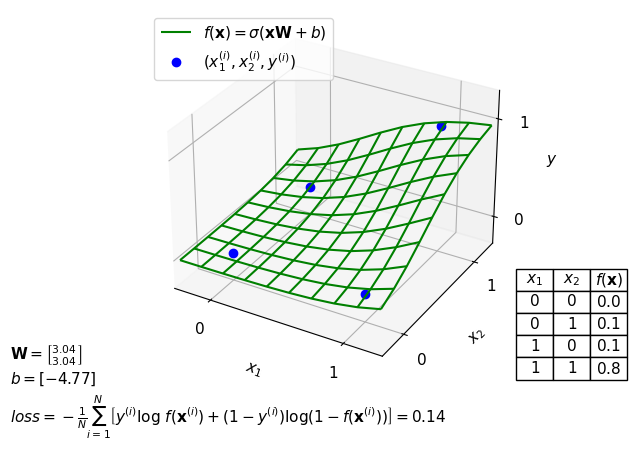

In [10]:
fig = plt.figure("Logistic regression: the logical AND operator")

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color="green", label="$f(\\mathbf{x})=\\sigma(\\mathbf{xW}+b)$")

plot1.plot(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), 'o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$", color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  bbox=[1.0, 0.0, 0.3, 0.3])


def update_figure(event=None):
    if (event is not None):
        if event.key == "W":
            AND_model.W[0, 0] += 0.2
        elif event.key == "w":
            AND_model.W[0, 0] -= 0.2
        elif event.key == "E":
            AND_model.W[1, 0] += 0.2
        elif event.key == "e":
            AND_model.W[1, 0] -= 0.2

        elif event.key == "B":
            AND_model.b[0, 0] += 0.2
        elif event.key == "b":
            AND_model.b[0, 0] -= 0.2

        elif event.key == "c":
            AND_model.W = W_init.copy()
            AND_model.b = b_init.copy()

    global plot1_f
    plot1_f.remove()
    x1_grid, x2_grid = np.meshgrid(np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
    y_grid = np.empty([10, 10])
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            y_grid[i, j] = AND_model.f([[x1_grid[i, j], x2_grid[i, j]]])
    plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

    plot1_info.set_text(
        "$\\mathbf{W}=\\genfrac{[}{]}{0}{}{%.2f}{%.2f}$\n$b=[%.2f]$\n$loss = -\\frac{1}{N}\\sum_{i=1}^{N}\\left [ y^{(i)} \\log\\/f(\\mathbf{x}^{(i)}) + (1-y^{(i)}) \\log (1-f(\\mathbf{x}^{(i)})) \\right ] = %.2f$"
        % (AND_model.W[0, 0], AND_model.W[1, 0], AND_model.b[0, 0], AND_model.loss(x_train, y_train)))

    table._cells[(1, 2)]._text.set_text("${%.1f}$" % AND_model.f([[0, 0]]))
    table._cells[(2, 2)]._text.set_text("${%.1f}$" % AND_model.f([[0, 1]]))
    table._cells[(3, 2)]._text.set_text("${%.1f}$" % AND_model.f([[1, 0]]))
    table._cells[(4, 2)]._text.set_text("${%.1f}$" % AND_model.f([[1, 1]]))

    plt.pause(0.01)
    fig.canvas.draw()


update_figure()
fig.canvas.mpl_connect('key_press_event', update_figure)

plt.show()

## OR-Operator

In [11]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d

matplotlib.rcParams.update({'font.size': 11})
    
OR_model = SigmoidModel()


x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [1]])

In [12]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([OR_model.W, OR_model.b], 0.001)

# Run 10000 optimization iterations.
for epoch in range(100000):
    OR_model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b

    optimizer.zero_grad()  # Clear gradients for next step


print("W = %s, b = %s, loss = %s" % (OR_model.W, OR_model.b, OR_model.loss(x_train, y_train)))

W = tensor([[4.0099],
        [4.0099]], requires_grad=True), b = tensor([[-1.4655]], requires_grad=True), loss = tensor(0.0901, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


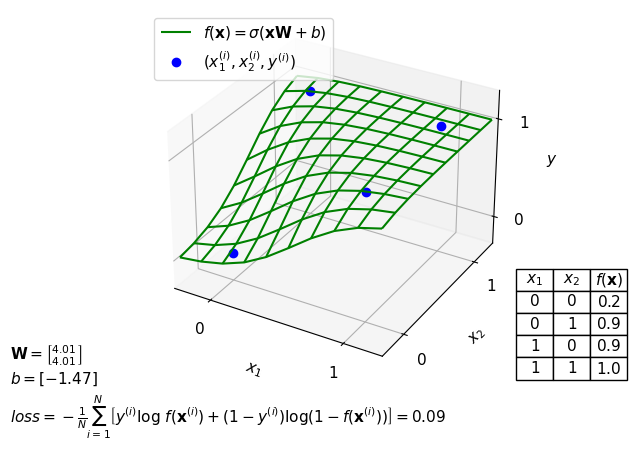

In [13]:
fig = plt.figure("Logistic regression: the logical OR operator")

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(np.array([[]]), np.array([[]]), np.array([[]]), color="green", label="$f(\\mathbf{x})=\\sigma(\\mathbf{xW}+b)$")

plot1.plot(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), 'o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$", color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  bbox=[1.0, 0.0, 0.3, 0.3])


def update_figure(event=None):
    if (event is not None):
        if event.key == "W":
            OR_model.W[0, 0] += 0.2
        elif event.key == "w":
            OR_model.W[0, 0] -= 0.2
        elif event.key == "E":
            OR_model.W[1, 0] += 0.2
        elif event.key == "e":
            OR_model.W[1, 0] -= 0.2

        elif event.key == "B":
            OR_model.b[0, 0] += 0.2
        elif event.key == "b":
            OR_model.b[0, 0] -= 0.2

        elif event.key == "c":
            OR_model.W = W_init.copy()
            OR_model.b = b_init.copy()

    global plot1_f
    plot1_f.remove()
    x1_grid, x2_grid = np.meshgrid(np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
    y_grid = np.empty([10, 10])
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            y_grid[i, j] = OR_model.f([[x1_grid[i, j], x2_grid[i, j]]])
    plot1_f = plot1.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

    plot1_info.set_text(
        "$\\mathbf{W}=\\genfrac{[}{]}{0}{}{%.2f}{%.2f}$\n$b=[%.2f]$\n$loss = -\\frac{1}{N}\\sum_{i=1}^{N}\\left [ y^{(i)} \\log\\/f(\\mathbf{x}^{(i)}) + (1-y^{(i)}) \\log (1-f(\\mathbf{x}^{(i)})) \\right ] = %.2f$"
        % (OR_model.W[0, 0], OR_model.W[1, 0], OR_model.b[0, 0], OR_model.loss(x_train, y_train)))

    table._cells[(1, 2)]._text.set_text("${%.1f}$" % OR_model.f([[0, 0]]))
    table._cells[(2, 2)]._text.set_text("${%.1f}$" % OR_model.f([[0, 1]]))
    table._cells[(3, 2)]._text.set_text("${%.1f}$" % OR_model.f([[1, 0]]))
    table._cells[(4, 2)]._text.set_text("${%.1f}$" % OR_model.f([[1, 1]]))

    plt.pause(0.01)
    fig.canvas.draw()


update_figure()
fig.canvas.mpl_connect('key_press_event', update_figure)

plt.show()

## XOR-Operator


In [14]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random


matplotlib.rcParams.update({'font.size': 11})

def rand_num():
    return random.uniform(-1, 1)

# Default values attained from lecture
W1_default = torch.tensor([[10.0, -10.0], [10.0, -10.0]], requires_grad=True)
W2_default = torch.tensor([[10.0], [10.0]], requires_grad=True)
b1_default = torch.tensor([[-5.0, 15.0]], requires_grad=True)
b2_default = torch.tensor([[-15.0]], requires_grad=True)

class XORSigmoidModel:
    def __init__(self, W1=W1_default, W2=W2_default, b1=b1_default, b2=b2_default):
        # Model variables
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2
        
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)
    
    def f2(self, h):
        return torch.sigmoid(h @ self.W2 + self.b2)
        
    # Predictor
    def f(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        return self.f2(self.f1(x))
    
    # Cross Entropy loss
    def loss(self, x, y):
        y = torch.tensor(y, dtype=torch.float32)
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)


XOR_model = XORSigmoidModel()
rand_XOR_model = XORSigmoidModel(torch.rand((2,2), requires_grad=True), torch.rand((2,1), requires_grad=True), torch.rand((1,2), requires_grad=True), torch.rand((1,1), requires_grad=True))

x_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float).reshape(-1,2)
y_train = torch.tensor([[0], [1], [1], [0]], dtype=torch.float)

In [15]:
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([XOR_model.b1, XOR_model.W1, XOR_model.W2, XOR_model.b2], 0.01)
rand_optimizer = torch.optim.SGD([rand_XOR_model.b1, rand_XOR_model.W1, rand_XOR_model.W2, rand_XOR_model.b2], 0.01)

for epoch in range(200000):
    XOR_model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step
    
    rand_XOR_model.loss(x_train, y_train).backward()  
    rand_optimizer.step()  
    rand_optimizer.zero_grad()


print("W1 = %s, W2 = %s, b1 = %s, b2 = %s, loss = %s" % (XOR_model.W1, XOR_model.W2, XOR_model.b1, XOR_model.b2, XOR_model.loss(x_train, y_train)))

/var/folders/h0/88jjy3r533d1nj8s86kss9b80000gn/T/ipykernel_53443/3973250491.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)
/var/folders/h0/88jjy3r533d1nj8s86kss9b80000gn/T/ipykernel_53443/3973250491.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)


W1 = tensor([[ 10., -10.],
        [ 10., -10.]], requires_grad=True), W2 = tensor([[10.5289],
        [10.5289]], requires_grad=True), b1 = tensor([[-5., 15.]], requires_grad=True), b2 = tensor([[-15.8891]], requires_grad=True), loss = tensor(0.5053, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


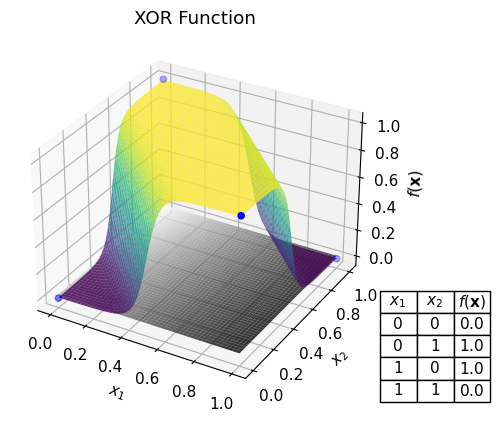

In [21]:
xt = x_train.t()[0]
yt = x_train.t()[1]

x1_values = np.linspace(0, 1, 50)
x2_values = np.linspace(0, 1, 50)
x1, x2 = np.meshgrid(x1_values, x2_values)
x_grid = np.column_stack((x1.ravel(), x2.ravel()))

y_grid_xor = XOR_model.f(x_grid).reshape(x1.shape)
y_grid_rand_xor = rand_XOR_model.f(x_grid).reshape(x1.shape)


fig = plt.figure("Logistic regression: the logical XOR operator")
ax = fig.add_subplot(111, projection='3d')

table = plt.table(cellText=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(\\mathbf{x})$"],
                  cellLoc="center",
                  bbox=[1.0, 0.0, 0.3, 0.3])

table._cells[(1, 2)]._text.set_text("${%.1f}$" % XOR_model.f([[0, 0]]))
table._cells[(2, 2)]._text.set_text("${%.1f}$" % XOR_model.f([[0, 1]]))
table._cells[(3, 2)]._text.set_text("${%.1f}$" % XOR_model.f([[1, 0]]))
table._cells[(4, 2)]._text.set_text("${%.1f}$" % XOR_model.f([[1, 1]]))


ax.plot_surface(x1, x2, y_grid_xor.detach().numpy(), cmap='viridis', alpha=0.8, label="XOR Model")
ax.plot_surface(x1, x2, y_grid_rand_xor.detach().numpy(), cmap='gray', alpha=0.8, label="Random XOR Model")


ax.scatter(xt, yt, y_train.squeeze(), color='blue', marker='o', label="$(x_1^{(i)}, x_2^{(i)},y^{(i)})$")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(\\mathbf{x})$")
ax.set_title("XOR Function")


plt.show()

## Classifying Handwritten Numbers

The dataset used to train the model comes from MNIST.

In [22]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output


class MNISTModel:
    def __init__(self):
        # Model variables
        self.W = torch.zeros(784, 10, requires_grad=True)
        self.b = torch.zeros(1, 10, requires_grad=True)
        
    def logits(self, x):
        return x @ self.W + self.b
    
    # Predictor
    def f(self, x):
        return torch.nn.functional.softmax(self.logits(x), dim=-1)
    
    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())

MNIST_model = MNISTModel()

In [23]:
TOL = 0.9
    
# Optimize the model parameters in order to minimize the loss. This is done using Py
optimizer = torch.optim.SGD([MNIST_model.W, MNIST_model.b], 0.0001)

for epoch in range(1000):
    if MNIST_model.accuracy(x_test, y_test) >= TOL:
        print("Accuracy achieved")
        break;
    MNIST_model.loss(x_train, y_train).backward()  # Compute loss gradients (Back Propagation)
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step
    
print("W = %s, b = %s, loss = %s" % (MNIST_model.W, MNIST_model.b, MNIST_model.loss(x_train, y_train)))

Accuracy achieved
W = tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True), b = tensor([[-1.2242e-05, -1.8778e-06, -1.4498e-05, -1.6718e-05, -8.3355e-06,
         -5.3767e-06, -1.1020e-05, -5.1675e-06, -3.5161e-05, -1.7868e-05]],
       requires_grad=True), loss = tensor(0.0883, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


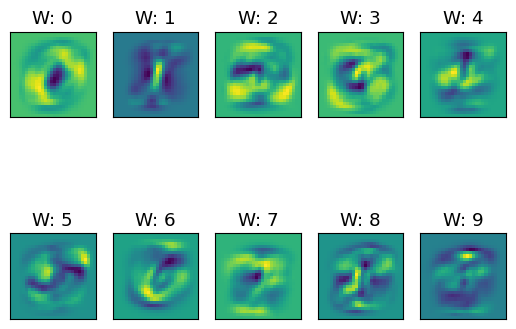

In [24]:
fig = plt.figure('Optimized W images')

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(MNIST_model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])